In [6]:
import torch
from torchvision import datasets, models, transforms
best_model = torch.load('adam_resnet101_10classes.pth',map_location=torch.device('cpu'))

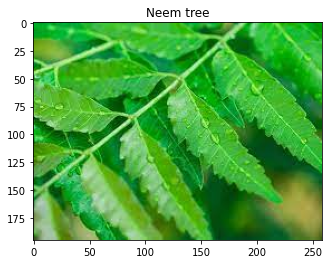

In [15]:
from PIL import *
import matplotlib.pyplot as plt
imsize = 256
loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])

def image_loader(image):
    """load image, returns cuda tensor"""    
    image = loader(image).float()
    image = image.unsqueeze(0) 
    return image

img = Image.open('1.jpeg') 
image = image_loader(img)
    
with torch.no_grad():
    logits = best_model.forward(image)
    
    y = torch.softmax(logits, dim=1)
    
    if (torch.max(y)<0.3):
        label = ''
    else:
        indices = torch.argmax(y)
        class_names = ['Chritmas bush','Guava','Golden Apple','Sensitive Plant','Indian Goose Berry','Tamarind', 'Curry leaves','Indian aloe','Moringa tree','Neem tree']
        for i in range(len(class_names)):
            if indices == i:
                label = class_names[i]

plt.imshow(img)
plt.title(label)
plt.show()